## Função de verosimilhança para v.a. binomial

No handles with labels found to put in legend.


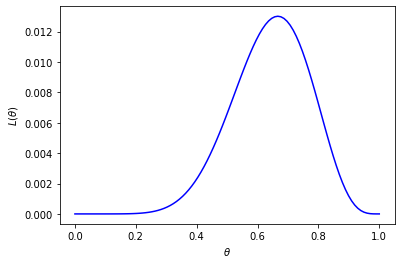

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
theta = np.linspace(0,1,100)

# the function, which is y = sin(x) here
L = 27 * theta**8 * (1-theta)**4

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.legend(frameon=False, loc=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')

# plot the function
plt.plot(theta, L, 'b')

# show the plot
plt.show()

## Função de verosimilhança para v.a. exponencial

No handles with labels found to put in legend.


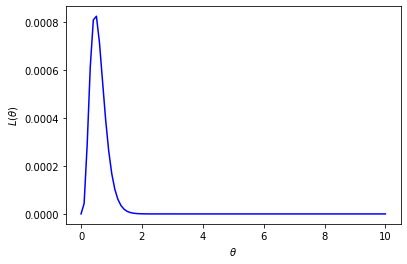

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# 100 linearly spaced numbers
theta = np.linspace(0,10,100)

# the function, which is y = sin(x) here
L = theta**4 * math.e**(-8.65*theta)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.legend(frameon=False, loc=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')

# plot the function
plt.plot(theta, L, 'b')

# show the plot
plt.show()

O código a seguir exemplifica o conceito de Estimação por Máxima Verossimilhança (EMV) usando uma distribuição normal $\mathcal{N}(\mu, \sigma^2)$ como exemplo. O objetivo é estimar os parâmetros $\mu$ e $\sigma^2$ de uma amostra de dados.

Segue uma explicação do código fornecido:

1. **Geração de Dados**:
   - Primeiro, geramos uma amostra de tamanho `sample_size` a partir de uma distribuição normal com parâmetros conhecidos (`mu_real` e `sigma_real`).
   - O código utiliza `np.random.normal` para criar essa amostra, onde `mu_real` é a média e `sigma_real` é o desvio padrão da distribuição.

2. **Função de Verossimilhança**:
   - A função de verossimilhança é definida para calcular a probabilidade de observarmos os dados amostrais para diferentes valores de $\mu$ e $\sigma$.
   - Esta função leva em consideração a fórmula da verossimilhança para a distribuição normal:
     $$
     L(\mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
     $$
   - No código, a função `verossimilhanca` implementa essa fórmula de maneira vetorizada.

3. **Grade de Valores**:
   - Criamos uma grade de valores para $\mu$ e $\sigma$ usando `np.linspace`.
   - Esses valores são utilizados para calcular a verossimilhança em diferentes pontos, cobrindo um intervalo de possíveis valores para $\mu$ e $\sigma$.

4. **Cálculo da Verossimilhança**:
   - Para cada par $\mu$ e $\sigma$ na grade, calculamos a verossimilhança dos dados amostrais.
   - A verossimilhança é armazenada em uma matriz `verossimilhança` para posterior análise.

5. **Máxima Verossimilhança**:
   - O par $\mu$ e $\sigma$ que maximiza a função de verossimilhança é identificado utilizando `np.argmax`.
   - Estes valores correspondem às estimativas de $\mu$ e $\sigma$ que tornam a amostra mais provável.

6. **Visualização**:
   - A superfície de verossimilhança é plotada usando `matplotlib`.
   - O gráfico mostra onde a função de verossimilhança atinge seu máximo, com as estimativas de $\mu$ e $\sigma$ destacadas.


Valor estimado de mu: 4.747474747474747
Valor estimado de sigma: 1.8181818181818181


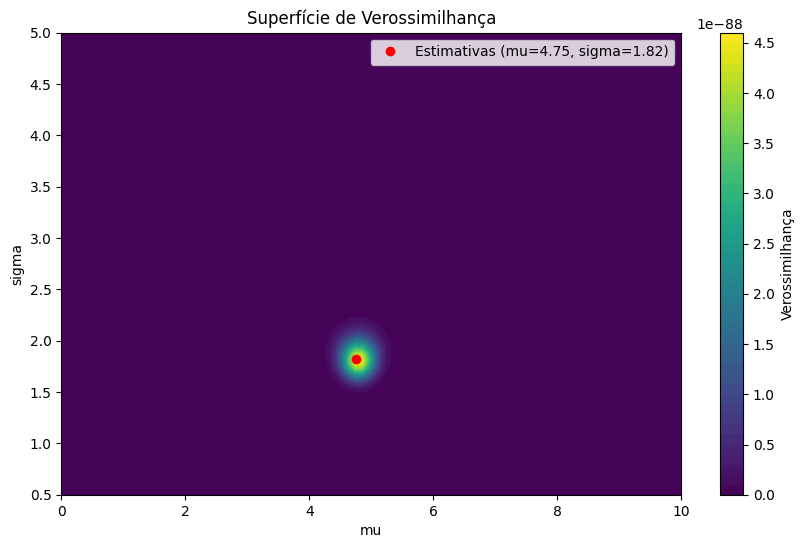

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Gerando uma amostra aleatória de uma distribuição normal com parâmetros conhecidos
np.random.seed(42)
mu_real = 5  # valor real de mu
sigma_real = 2  # valor real de sigma
sample_size = 100  # tamanho da amostra
data = np.random.normal(mu_real, sigma_real, sample_size)

# Definindo a função de verossimilhança
def verossimilhanca(mu, sigma, data):
    n = len(data)
    likelihood = (1/(sigma * np.sqrt(2 * np.pi))) ** n * np.exp(-np.sum((data - mu) ** 2) / (2 * sigma ** 2))
    return likelihood

# Criando uma grade de valores para mu e sigma
mu_values = np.linspace(0, 10, 100)
sigma_values = np.linspace(0.5, 5, 100)

# Calculando a verossimilhança para cada par de (mu, sigma)
verossimilhança = np.zeros((len(mu_values), len(sigma_values)))
for i, mu in enumerate(mu_values):
    for j, sigma in enumerate(sigma_values):
        verossimilhança[i, j] = verossimilhanca(mu, sigma, data)

# Encontrando os valores de mu e sigma que maximizam a verossimilhança
max_indices = np.unravel_index(np.argmax(verossimilhança), verossimilhança.shape)
mu_est = mu_values[max_indices[0]]
sigma_est = sigma_values[max_indices[1]]

print(f"Valor estimado de mu: {mu_est}")
print(f"Valor estimado de sigma: {sigma_est}")

# Plotando a superfície de verossimilhança
plt.figure(figsize=(10, 6))
plt.contourf(mu_values, sigma_values, verossimilhança.T, levels=50, cmap='viridis')
plt.colorbar(label='Verossimilhança')
plt.plot(mu_est, sigma_est, 'ro', label=f"Estimativas (mu={mu_est:.2f}, sigma={sigma_est:.2f})")
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Superfície de Verossimilhança')
plt.legend()
plt.show()
